In [2]:
pip install pymorphy3

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

import re
import nltk
import pymorphy3

from nltk.stem.snowball import SnowballStemmer

In [6]:
df = pd.read_csv('imdb_top_250.csv')

In [70]:
df.head(250)

,title,year,duration,description,genre,country,prep_text,text_lemm
0,Побег из Шоушенка,1994,2h 22m,"Банкир, осужденный за уксорицид, образует друж...",Драма,United States,банкир осужденный за уксорицид образует дружбу...,банкир осудить за уксорицид образовать дружба ...
1,Крестный отец,1972,2h 55m,Старение патриарха организованной криминальной...,"Преступление, драма",United States,старение патриарха организованной криминальной...,старение патриарх организовать криминальный ди...
2,Тёмный рыцарь,2008,2h 32m,"Когда угроза, известная как Джокер, наносит ущ...","Действие, преступность, драма",United States,когда угроза известная как джокер наносит ущер...,когда угроза известный как джокер наносить уще...
3,Крестный отец 2,1974,3h 22m,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,"Преступление, драма",United States,ранняя жизнь и карьера вито корлеоне в 1920 х ...,ранний жизнь и карьера вить корлеон в 1920 х г...
4,12 разгневанных мужчин,1957,1h 36m,Присяжные в суде по делу об убийстве в Нью -Йо...,"Преступление, драма",United States,присяжные в суде по делу об убийстве в нью йор...,присяжный в суд по дело о убийство в нью йорк ...
...,...,...,...,...,...,...,...,...
245,День сурка,1993,1h 41m,"Нарциссический, эгоистичный метеоролог оказыва...","Комедия, драма, фантазия",United States,нарциссический эгоистичный метеоролог оказывае...,нарциссический эгоистичный метеоролог оказыват...
246,Прислуга,2011,2h 26m,Начинающий автор во время движения за гражданс...,Драма,United States,начинающий автор во время движения за гражданс...,начинающий автор в время движение за гражданск...
247,Истребитель демонов: Битва в доме Цудзуми,2021,1h 27m,"Танджиро отправляется на юго-юго-восток, где о...","Анимация, действие, фантазия",Japan,танджиро отправляется на югоюговосток где он с...,танджиро отправляться на югоюговостка где он с...
248,Сука любовь,2000,2h 34m,"Любительский боец ​​собаки, супермодель и забр...","Драма, триллер",Mexico,любительский боец ​​собаки супермодель и забро...,любительский боец ​​собака супермодель и забро...


In [12]:
df = df.drop(columns=['Unnamed: 0'])

In [14]:
df.head()

,title,year,duration,description,genre,country
0,Побег из Шоушенка,1994,2h 22m,"Банкир, осужденный за уксорицид, образует друж...",Драма,United States
1,Крестный отец,1972,2h 55m,Старение патриарха организованной криминальной...,"Преступление, драма",United States
2,Тёмный рыцарь,2008,2h 32m,"Когда угроза, известная как Джокер, наносит ущ...","Действие, преступность, драма",United States
3,Крестный отец 2,1974,3h 22m,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,"Преступление, драма",United States
4,12 разгневанных мужчин,1957,1h 36m,Присяжные в суде по делу об убийстве в Нью -Йо...,"Преступление, драма",United States


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        250 non-null    object
 1   year         250 non-null    int64 
 2   duration     250 non-null    object
 3   description  250 non-null    object
 4   genre        250 non-null    object
 5   country      250 non-null    object
dtypes: int64(1), object(5)
memory usage: 11.8+ KB


In [18]:
janr = ['драма', 'драма, фэнтези, криминал','драма, комедия, мелодрама, история, военный', 'драма, биография, история, военный','драма, комедия','фантастика, боевик, триллер, драма, детектив', 'боевик, триллер, драма, криминал',
        'мультфильм, мюзикл, драма, приключения, семейный','триллер, драма, криминал','комедия, фантастика, приключения','военный, комедия, драма, мелодрама',
        'драма, комедия, криминал','драма, криминал','криминал, драма','комедия, мелодрама, криминал','триллер, фантастика, драма, детектив',
        'биография, драма, мелодрама','фантастика, драма, приключения','фэнтези, приключения, драма, боевик','история, боевик, драма','фантастика, комедия, приключения', 
        'боевик, комедия, криминал','фантастика, боевик','комедия, криминал','криминал, драма, триллер','криминал, биография, комедия','драма, военный, биография, музыка',
        'фэнтези, приключения, драма, боевик','военный, драма, комедия','мультфильм, фантастика, приключения, семейный','мультфильм, фэнтези, комедия, приключения, семейный, музыка',
        'криминал, комедия, боевик','фэнтези, приключения, драма, боевик','драма, криминал','комедия, драма, криминал, детектив',
        'фэнтези, боевик, приключения','триллер, детектив, драма','фантастика, боевик, триллер, криминал, драма','драма','мелодрама, история, триллер, драма',
        'драма, детектив, криминал','драма','драма, фантастика','мелодрама, комедия, криминал, музыка','драма, семейный, биография',
        'комедия, мелодрама, драма','аниме, мультфильм, фэнтези, приключения, семейный','комедия, приключения, мелодрама, мюзикл','драма, военный, история',
        'фэнтези, драма, мелодрама, семейный']

In [20]:
df['description'][0]

'Банкир, осужденный за уксорицид, образует дружбу за четверть века с закаленным осужденным, сохраняя при этом его невиновность и пытаясь оставаться надежды на простое сострадание.'

In [26]:
df['description'][200]

'Женщина вышла замуж за бывшего политика во время военной диктатуры в Бразилии, вынуждена заново изобретать себя и наметить новый курс для своей семьи после насильственного и произвольного акта.'

In [28]:
st = '\xa0—'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])

In [30]:
df['prep_text']= [remove_othersymbol(text.lower()) for text in df['description']]

In [32]:
df['prep_text'][0]

'банкир, осужденный за уксорицид, образует дружбу за четверть века с закаленным осужденным, сохраняя при этом его невиновность и пытаясь оставаться надежды на простое сострадание.'

In [34]:
df['prep_text'][200]

'женщина вышла замуж за бывшего политика во время военной диктатуры в бразилии, вынуждена заново изобретать себя и наметить новый курс для своей семьи после насильственного и произвольного акта.'

In [36]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
def remove_punctuation(text):
    return ''.join([ch for ch in text if ch not in string.punctuation])

In [40]:
df['prep_text']= [remove_punctuation(text) for text in df['prep_text']]

In [42]:
df['prep_text'][0]

'банкир осужденный за уксорицид образует дружбу за четверть века с закаленным осужденным сохраняя при этом его невиновность и пытаясь оставаться надежды на простое сострадание'

In [44]:
df['prep_text'][200]

'женщина вышла замуж за бывшего политика во время военной диктатуры в бразилии вынуждена заново изобретать себя и наметить новый курс для своей семьи после насильственного и произвольного акта'

In [46]:
def remove_latin(text):
    return re.sub('[a-z]','', text, flags=re.I)

In [48]:
df.head()

,title,year,duration,description,genre,country,prep_text
0,Побег из Шоушенка,1994,2h 22m,"Банкир, осужденный за уксорицид, образует друж...",Драма,United States,банкир осужденный за уксорицид образует дружбу...
1,Крестный отец,1972,2h 55m,Старение патриарха организованной криминальной...,"Преступление, драма",United States,старение патриарха организованной криминальной...
2,Тёмный рыцарь,2008,2h 32m,"Когда угроза, известная как Джокер, наносит ущ...","Действие, преступность, драма",United States,когда угроза известная как джокер наносит ущер...
3,Крестный отец 2,1974,3h 22m,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,"Преступление, драма",United States,ранняя жизнь и карьера вито корлеоне в 1920 х ...
4,12 разгневанных мужчин,1957,1h 36m,Присяжные в суде по делу об убийстве в Нью -Йо...,"Преступление, драма",United States,присяжные в суде по делу об убийстве в нью йор...


In [50]:
russian_stopwords = stopwords.words("russian") 

In [52]:
russian_stopwords.extend(['т.д.', 'т', 'д', 'это','который','свой','своём','всем','всё','её','оба','ещё','должный']) 

In [54]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/ruslanhudakov/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [56]:
morph = pymorphy3.MorphAnalyzer(lang='ru')

In [58]:
%%time
lemm_texts_list = []
for text in (df['prep_text']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = morph.parse(word)[0]
            res.append(p.normal_form)
        text = " ".join(res)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
    
df['text_lemm'] = lemm_texts_list

CPU times: user 379 ms, sys: 7.73 ms, total: 386 ms
Wall time: 385 ms


In [60]:
df.head()

,title,year,duration,description,genre,country,prep_text,text_lemm
0,Побег из Шоушенка,1994,2h 22m,"Банкир, осужденный за уксорицид, образует друж...",Драма,United States,банкир осужденный за уксорицид образует дружбу...,банкир осудить за уксорицид образовать дружба ...
1,Крестный отец,1972,2h 55m,Старение патриарха организованной криминальной...,"Преступление, драма",United States,старение патриарха организованной криминальной...,старение патриарх организовать криминальный ди...
2,Тёмный рыцарь,2008,2h 32m,"Когда угроза, известная как Джокер, наносит ущ...","Действие, преступность, драма",United States,когда угроза известная как джокер наносит ущер...,когда угроза известный как джокер наносить уще...
3,Крестный отец 2,1974,3h 22m,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,"Преступление, драма",United States,ранняя жизнь и карьера вито корлеоне в 1920 х ...,ранний жизнь и карьера вить корлеон в 1920 х г...
4,12 разгневанных мужчин,1957,1h 36m,Присяжные в суде по делу об убийстве в Нью -Йо...,"Преступление, драма",United States,присяжные в суде по делу об убийстве в нью йор...,присяжный в суд по дело о убийство в нью йорк ...


In [62]:
df['text_lemm'][0]

'банкир осудить за уксорицид образовать дружба за четверть век с закалённый осудить сохранять при это он невиновность и пытаться оставаться надежда на простой сострадание'

In [64]:
df['text_lemm'][200]

'женщина выйти замуж за бывший политика в время военный диктатура в бразилия вынудить заново изобретать себя и наметить новый курс для свой семья после насильственный и произвольный акт'

In [66]:
def tokenize(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    text = " ".join(tokens)
    return text

In [72]:
df['tokenize_text'] = [tokenize(text) for text in df['text_lemm']]

In [74]:
df.head()

,title,year,duration,description,genre,country,prep_text,text_lemm,tokenize_text
0,Побег из Шоушенка,1994,2h 22m,"Банкир, осужденный за уксорицид, образует друж...",Драма,United States,банкир осужденный за уксорицид образует дружбу...,банкир осудить за уксорицид образовать дружба ...,банкир осудить уксорицид образовать дружба чет...
1,Крестный отец,1972,2h 55m,Старение патриарха организованной криминальной...,"Преступление, драма",United States,старение патриарха организованной криминальной...,старение патриарх организовать криминальный ди...,старение патриарх организовать криминальный ди...
2,Тёмный рыцарь,2008,2h 32m,"Когда угроза, известная как Джокер, наносит ущ...","Действие, преступность, драма",United States,когда угроза известная как джокер наносит ущер...,когда угроза известный как джокер наносить уще...,угроза известный джокер наносить ущерб хаос на...
3,Крестный отец 2,1974,3h 22m,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,"Преступление, драма",United States,ранняя жизнь и карьера вито корлеоне в 1920 х ...,ранний жизнь и карьера вить корлеон в 1920 х г...,ранний жизнь карьера вить корлеон 1920 х год и...
4,12 разгневанных мужчин,1957,1h 36m,Присяжные в суде по делу об убийстве в Нью -Йо...,"Преступление, драма",United States,присяжные в суде по делу об убийстве в нью йор...,присяжный в суд по дело о убийство в нью йорк ...,присяжный суд дело убийство нью йорк разочаров...


In [76]:
df['tokenize_text'][0]

'банкир осудить уксорицид образовать дружба четверть век закалённый осудить сохранять невиновность пытаться оставаться надежда простой сострадание'

In [82]:
df['tokenize_text'][200]

'женщина выйти замуж бывший политика время военный диктатура бразилия вынудить заново изобретать наметить новый курс семья насильственный произвольный акт'

In [84]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [86]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus

# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

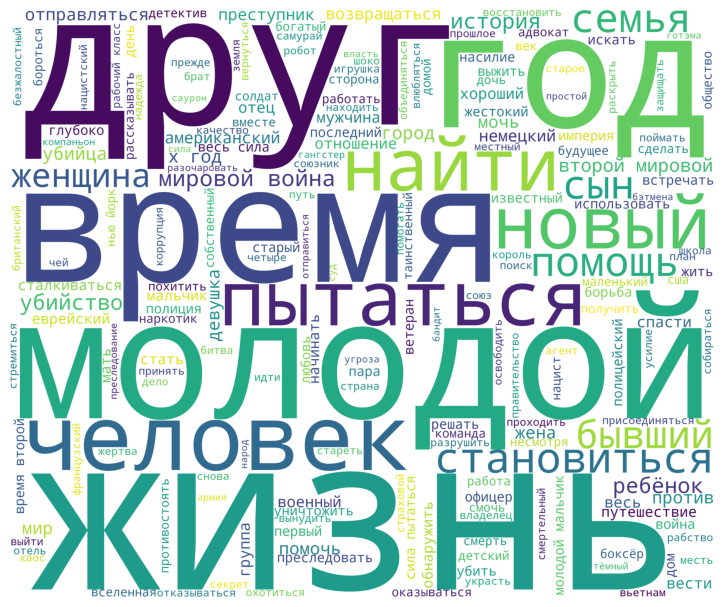

In [90]:
corpus = get_corpus(df['tokenize_text'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)
plt.show()

In [92]:
# Получение облака слов
def get_wordCloud2(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(corpus)
    return wordCloud

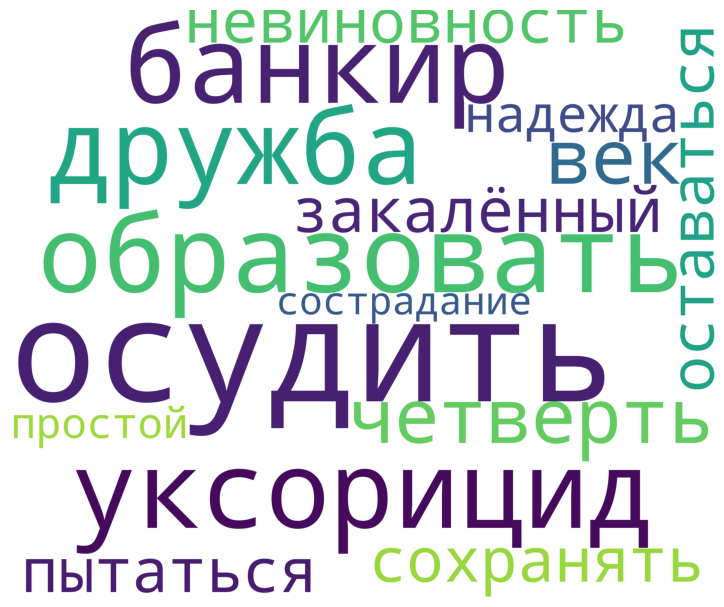

In [100]:
corpus = df['tokenize_text'][0]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)
plt.show()

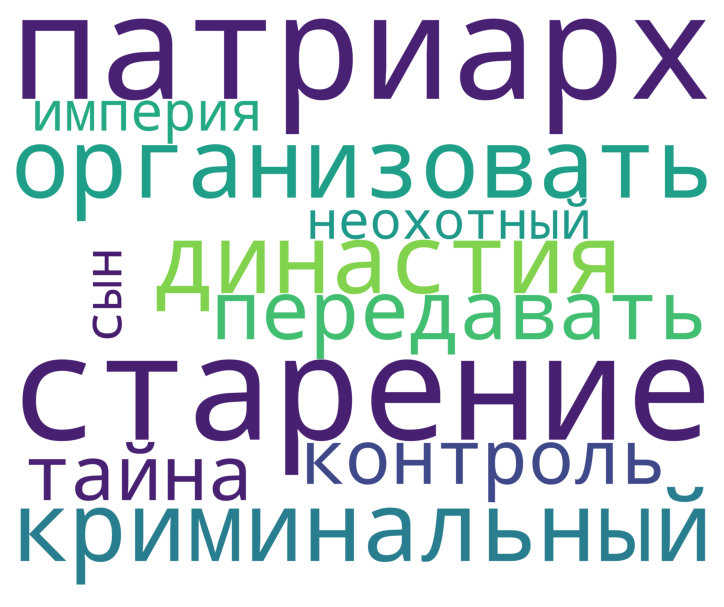

In [108]:
corpus = df['tokenize_text'][1]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)
plt.show()

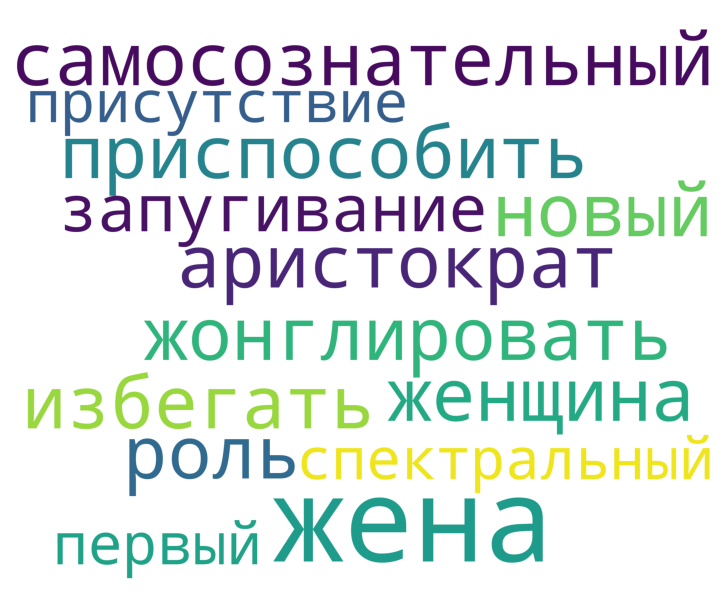

In [116]:
corpus = df['tokenize_text'][249]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)
plt.show()

In [118]:
import re
from collections import Counter

def remove_most_common_words(text, num_words=10):
   
    words = re.findall(r"\b[a-zA-Zа-яА-ЯёЁ]+\b", text.lower())
    
    word_counts = Counter(words)
    
    most_common = [word for word, count in word_counts.most_common(num_words)]

    #print(word_counts)
    
    pattern = re.compile(r"\b(" + "|".join(map(re.escape, most_common)) + r")\b", flags=re.IGNORECASE)
    cleaned_text = pattern.sub("", text)
    
    cleaned_text = re.sub(r"\s+", " ", cleaned_text).strip()

    return cleaned_text


In [120]:
df['tokenize_text'][0]

'банкир осудить уксорицид образовать дружба четверть век закалённый осудить сохранять невиновность пытаться оставаться надежда простой сострадание'

In [122]:
cleaned_text = remove_most_common_words(df['tokenize_text'][0], 5)
print("Очищенный текст:", cleaned_text)

Очищенный текст: четверть век закалённый сохранять невиновность пытаться оставаться надежда простой сострадание


In [124]:
cleaned_text = remove_most_common_words(df['tokenize_text'][200], 5)
print("Очищенный текст:", cleaned_text)

Очищенный текст: время военный диктатура бразилия вынудить заново изобретать наметить новый курс семья насильственный произвольный акт


In [126]:
df['tokenize_text2'] = [remove_most_common_words(text, 5) for text in df['tokenize_text']]

In [128]:
df.head()

,title,year,duration,description,genre,country,prep_text,text_lemm,tokenize_text,tokenize_text2
0,Побег из Шоушенка,1994,2h 22m,"Банкир, осужденный за уксорицид, образует друж...",Драма,United States,банкир осужденный за уксорицид образует дружбу...,банкир осудить за уксорицид образовать дружба ...,банкир осудить уксорицид образовать дружба чет...,четверть век закалённый сохранять невиновность...
1,Крестный отец,1972,2h 55m,Старение патриарха организованной криминальной...,"Преступление, драма",United States,старение патриарха организованной криминальной...,старение патриарх организовать криминальный ди...,старение патриарх организовать криминальный ди...,передавать контроль тайна империя неохотный сын
2,Тёмный рыцарь,2008,2h 32m,"Когда угроза, известная как Джокер, наносит ущ...","Действие, преступность, драма",United States,когда угроза известная как джокер наносит ущер...,когда угроза известный как джокер наносить уще...,угроза известный джокер наносить ущерб хаос на...,хаос народ готэма бэтмена джеймс гордон харви ...
3,Крестный отец 2,1974,3h 22m,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,"Преступление, драма",United States,ранняя жизнь и карьера вито корлеоне в 1920 х ...,ранний жизнь и карьера вить корлеон в 1920 х г...,ранний жизнь карьера вить корлеон 1920 х год и...,1920 х год изображаться время сын майкл расшир...
4,12 разгневанных мужчин,1957,1h 36m,Присяжные в суде по делу об убийстве в Нью -Йо...,"Преступление, драма",United States,присяжные в суде по делу об убийстве в нью йор...,присяжный в суд по дело о убийство в нью йорк ...,присяжный суд дело убийство нью йорк разочаров...,йорк разочаровать член чей скептически осторож...


In [130]:
df['tokenize_text2'][0]

'четверть век закалённый сохранять невиновность пытаться оставаться надежда простой сострадание'

In [132]:
df['tokenize_text2'][200]

'время военный диктатура бразилия вынудить заново изобретать наметить новый курс семья насильственный произвольный акт'

In [134]:
df['tokenize_text2'][3]

'1920 х год изображаться время сын майкл расширять подтягивать власть отношение синдикат семейный преступность'

In [136]:
df['tokenize_text'][3]

'ранний жизнь карьера вить корлеон 1920 х год изображаться время сын майкл расширять подтягивать власть отношение синдикат семейный преступность'

In [138]:
df['description'][3]

'Ранняя жизнь и карьера Вито Корлеоне в 1920 -х годах изображаются, в то время как его сын Майкл расширяет и подтягивает свою власть в отношении синдиката по семейной преступности.'

# Векторизация текстовых данных

### Bag of words

In [142]:
vectorizer = CountVectorizer()
count_matrix1 = vectorizer.fit(df['tokenize_text2'])

In [144]:
len(vectorizer.vocabulary_)

1653

In [146]:
print(vectorizer.vocabulary_)

{'четверть': 1601, 'век': 180, 'закалённый': 444, 'сохранять': 1370, 'невиновность': 792, 'пытаться': 1171, 'оставаться': 897, 'надежда': 749, 'простой': 1148, 'сострадание': 1367, 'передавать': 956, 'контроль': 616, 'тайна': 1451, 'империя': 516, 'неохотный': 809, 'сын': 1446, 'хаос': 1570, 'народ': 769, 'готэма': 323, 'бэтмена': 168, 'джеймс': 364, 'гордон': 318, 'харви': 1572, 'дента': 351, 'работать': 1175, 'вместе': 211, 'положить': 1024, 'конец': 607, 'безумие': 109, '1920': 11, 'год': 310, 'изображаться': 508, 'время': 258, 'майкл': 676, 'расширять': 1205, 'подтягивать': 1005, 'власть': 206, 'отношение': 916, 'синдикат': 1297, 'семейный': 1282, 'преступность': 1096, 'йорк': 552, 'разочаровать': 1190, 'член': 1604, 'чей': 1593, 'скептически': 1308, 'осторожность': 904, 'заставлять': 463, 'тщательно': 1503, 'рассмотреть': 1202, 'доказательство': 382, 'прежде': 1085, 'принять': 1114, 'поспешный': 1048, 'приговор': 1104, 'против': 1149, 'армия': 86, 'саурон': 1262, 'привлечь': 1102,

In [148]:
vectorizer = CountVectorizer(analyzer='word', stop_words=russian_stopwords, ngram_range=(1, 3), min_df=2)
count_matrix = vectorizer.fit_transform(df['tokenize_text'])

In [150]:
count_matrix.shape

(250, 727)

In [152]:
vectorizer.get_feature_names_out()[160:200]

array(['диктатор', 'директор', 'доброта', 'доллар', 'дом', 'домой',
       'дорога', 'доставить', 'дочь', 'друг', 'друг друг', 'думать',
       'дух', 'еврейский', 'единственный', 'жаждать', 'железный', 'жена',
       'женщина', 'жертва', 'жестокий', 'жизнь', 'жизнь молодой',
       'жизнь отметить', 'житель', 'жить', 'жонглировать', 'журналист',
       'заботиться', 'завидовать', 'загадочный', 'задача', 'заклинание',
       'заключение', 'заключить', 'закон', 'запад', 'запрет', 'заставить',
       'заставлять'], dtype=object)

In [154]:
print(count_matrix)

  (0, 368)	1
  (0, 61)	1
  (0, 521)	1
  (0, 324)	1
  (0, 506)	1
  (0, 608)	1
  (1, 417)	1
  (1, 223)	1
  (1, 648)	1
  (2, 673)	1
  (2, 217)	1
  (2, 698)	1
  (2, 333)	1
  (2, 136)	1
  (2, 57)	1
  (2, 157)	1
  (2, 526)	1
  (2, 81)	1
  (2, 442)	1
  (2, 256)	1
  (2, 29)	1
  (2, 443)	1
  (3, 648)	1
  (3, 181)	1
  (3, 242)	1
  :	:
  (248, 521)	1
  (248, 181)	1
  (248, 582)	1
  (248, 327)	1
  (248, 670)	1
  (248, 67)	1
  (248, 69)	1
  (248, 583)	1
  (248, 70)	1
  (248, 8)	1
  (248, 282)	1
  (248, 537)	1
  (248, 337)	1
  (248, 522)	1
  (248, 35)	1
  (248, 594)	1
  (249, 177)	2
  (249, 359)	1
  (249, 19)	1
  (249, 178)	1
  (249, 493)	1
  (249, 215)	1
  (249, 416)	1
  (249, 186)	1
  (249, 554)	1


### TF-IDF

In [157]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                                 min_df=0.01, stop_words=russian_stopwords,
                                 ngram_range=(1,3))

In [159]:
%%time
tfidf_matrix = tfidf_vectorizer.fit_transform(df['tokenize_text'])

CPU times: user 27 ms, sys: 7.56 ms, total: 34.5 ms
Wall time: 32.3 ms


In [161]:
tfidf_matrix.shape

(250, 331)

In [163]:
print(tfidf_matrix)

  (0, 31)	0.5159018289096228
  (0, 239)	0.3648164658932055
  (0, 157)	0.535772153255226
  (0, 232)	0.5600914647958463
  (1, 109)	0.7624497542326485
  (1, 302)	0.6470474266006888
  (2, 314)	0.3112709750946123
  (2, 107)	0.2773759027116959
  (2, 321)	0.29775551147361645
  (2, 161)	0.3112709750946123
  (2, 70)	0.3112709750946123
  (2, 30)	0.3112709750946123
  (2, 242)	0.28671257362639074
  (2, 42)	0.29775551147361645
  (2, 209)	0.3112709750946123
  (2, 123)	0.28671257362639074
  (2, 210)	0.3112709750946123
  (3, 302)	0.412726041785985
  (3, 95)	0.31242644786888496
  (3, 68)	0.3216668507571915
  (3, 50)	0.3283063651197457
  (3, 40)	0.5457665125031377
  (3, 188)	0.4721559177641192
  (4, 300)	0.3381579958086333
  (4, 77)	0.3234750910208956
  :	:
  (247, 148)	0.23493515227459077
  (247, 289)	0.3378735054277842
  (247, 59)	0.34802118965022183
  (247, 231)	0.390549049131382
  (247, 192)	0.3136726951214405
  (247, 151)	0.37359131169972676
  (247, 110)	0.390549049131382
  (248, 239)	0.21587544233

In [165]:
tfidf_vectorizer.get_feature_names_out()[150:160]

array(['молодой мальчик', 'молодой человек', 'морской', 'мочь',
       'мошенник', 'муж', 'мужчина', 'надежда', 'найти', 'нанять'],
      dtype=object)

# Тематическое моделирование

Тематическое моделирование позволяет выделять из текстов темы, связанные с определенными множествами слов, и затем смотреть, с какой вероятностью тексты соотносятся с этими темами. 

Библиотека **gensim**. Это популярная открытая библиотека для тематического моделирования, в которой есть нужная модель — LDA (Латентном размещении Дирихле (LDA)). Затем следует создать словарь для тематического моделирования из лемматизированного текста. 

После создания словаря лучше всего отфильтровать те слова, которые встречаются в слишком большом количестве текстов, и те, которые встречаются слишком редко. Для этого есть метод filter_extremes, который принимает в себя аргументы no_above (только слова, которые встречаются не более чем в указанной доле текстов) и no_below (слова, которые встречаются не менее чем в указанном количестве текстов). 

После удаления лишних слов словарь лучше всего ужать в размерах, убрав пропуски с помощью метода compactify.

In [172]:
import gensim

In [174]:
def tokenize2(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    return tokens

In [176]:
df['tokenize_text3'] = [tokenize2(text) for text in df['tokenize_text2']]

In [178]:
df.head()

,title,year,duration,description,genre,country,prep_text,text_lemm,tokenize_text,tokenize_text2,tokenize_text3
0,Побег из Шоушенка,1994,2h 22m,"Банкир, осужденный за уксорицид, образует друж...",Драма,United States,банкир осужденный за уксорицид образует дружбу...,банкир осудить за уксорицид образовать дружба ...,банкир осудить уксорицид образовать дружба чет...,четверть век закалённый сохранять невиновность...,"[четверть, век, закалённый, сохранять, невинов..."
1,Крестный отец,1972,2h 55m,Старение патриарха организованной криминальной...,"Преступление, драма",United States,старение патриарха организованной криминальной...,старение патриарх организовать криминальный ди...,старение патриарх организовать криминальный ди...,передавать контроль тайна империя неохотный сын,"[передавать, контроль, тайна, империя, неохотн..."
2,Тёмный рыцарь,2008,2h 32m,"Когда угроза, известная как Джокер, наносит ущ...","Действие, преступность, драма",United States,когда угроза известная как джокер наносит ущер...,когда угроза известный как джокер наносить уще...,угроза известный джокер наносить ущерб хаос на...,хаос народ готэма бэтмена джеймс гордон харви ...,"[хаос, народ, готэма, бэтмена, джеймс, гордон,..."
3,Крестный отец 2,1974,3h 22m,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,"Преступление, драма",United States,ранняя жизнь и карьера вито корлеоне в 1920 х ...,ранний жизнь и карьера вить корлеон в 1920 х г...,ранний жизнь карьера вить корлеон 1920 х год и...,1920 х год изображаться время сын майкл расшир...,"[1920, х, год, изображаться, время, сын, майкл..."
4,12 разгневанных мужчин,1957,1h 36m,Присяжные в суде по делу об убийстве в Нью -Йо...,"Преступление, драма",United States,присяжные в суде по делу об убийстве в нью йор...,присяжный в суд по дело о убийство в нью йорк ...,присяжный суд дело убийство нью йорк разочаров...,йорк разочаровать член чей скептически осторож...,"[йорк, разочаровать, член, чей, скептически, о..."


In [180]:
gensim_dictionary = gensim.corpora.Dictionary(df['tokenize_text3'])
gensim_dictionary.filter_extremes(no_above=0.1, no_below=20)
gensim_dictionary.compactify()

In [182]:
corpus = [gensim_dictionary.doc2bow(text) 
          for text in df['tokenize_text3']]

In [184]:
corpus

[[],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [(1, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(1, 1)],
 [],
 [(1, 1)],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [(1, 1)],
 [],
 [],
 [],
 [(1, 1)],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(1, 1)],
 [],
 [],
 [(1, 1)],
 [(1, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(1, 1)],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [(1, 1)],
 [],
 [(0, 1)],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [(1, 1)],
 [],
 [],
 [],
 [],
 [(1, 1)],
 [],
 [],
 [],
 [],
 [(1, 1)],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [(1, 1)],
 [],
 [(0, 1)]

In [186]:
lda_20 = gensim.models.LdaMulticore(corpus, 
                                 num_topics=5, 
                                 id2word=gensim_dictionary, 
                                 passes=10, random_state=6457)

In [188]:
lda_20.print_topics()

[(0, '0.983*"время" + 0.017*"жизнь"'),
 (1, '0.505*"время" + 0.495*"жизнь"'),
 (2, '0.565*"жизнь" + 0.435*"время"'),
 (3, '0.984*"время" + 0.016*"жизнь"'),
 (4, '0.990*"жизнь" + 0.010*"время"')]

In [192]:
pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 171.7 kB/s eta 0:00:00a 0:00:02
Note: you may need to restart the kernel to use updated packages.


In [194]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [196]:
vis_20 = gensimvis.prepare(lda_20, corpus, gensim_dictionary)

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=38529) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=38529) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=38529) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=38529) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarnin

In [198]:
pyLDAvis.enable_notebook()

In [200]:
vis_20

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
4     -0.382051  0.0       1        1  33.448290
0      0.242153  0.0       2        1  24.160057
3      0.244340  0.0       3        1  22.637346
2     -0.063625  0.0       4        1   9.882656
1     -0.040817  0.0       5        1   9.871652, topic_info=    Term       Freq      Total Category  logprob  loglift
1  жизнь  19.000000  19.000000  Default   2.0000   2.0000
0  время  23.000000  23.000000  Default   1.0000   1.0000
1  жизнь  14.240452  19.086386   Topic1  -0.0099   0.8023
0  время   0.142313  23.913613   Topic1  -4.6158  -4.0290
0  время  10.207097  23.913613   Topic2  -0.0176   0.5691
1  жизнь   0.181727  19.086386   Topic2  -4.0460  -3.2338
0  время   9.574887  23.913613   Topic3  -0.0165   0.5703
1  жизнь   0.159171  19.086386   Topic3  -4.1134  -3.3012
1  жизнь   2.402058  19.086386   Topic4  -0.5705   0.2417
0  время   1.847484  23.913613   Topic4  -0.8330  -0.2462
1  жизнь   2.102979  19.086386   Topic5  -0.7023   0.1099
0  время   2.141832  23.913613   Topic5  -0.6840  -0.0973, token_table=      Topic      Freq   Term
term                        
0         2  0.418172  время
0         3  0.418172  время
0         4  0.083634  время
0         5  0.083634  время
1         1  0.733507  жизнь
1         4  0.104787  жизнь
1         5  0.104787  жизнь, R=2, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 4, 3, 2])

LDA - это метод машинного обучения, который используется для анализа тематической структуры в больших наборах документов. Который использует модель вероятности, чтобы определить, какие темы присутствуют в каждом документе, и какие слова связаны с каждой темой. LDA может быть полезен в случаях, когда нужно опредлить тематическую структуру в большом наборе документов, таких как статьи и т.д.

In [203]:
from gensim.models import CoherenceModel

coherence_model = CoherenceModel(model=lda_20,
                                 texts=df['tokenize_text3'],
                                 dictionary=gensim_dictionary,
                                 coherence="c_v")

coherence_value = coherence_model.get_coherence()
print(f"Когерентность модели: {coherence_value}")

Когерентность модели: 0.6252160385991066


In [205]:
from sklearn.decomposition import LatentDirichletAllocation

In [207]:
# создание модели LDA
lda_model = LatentDirichletAllocation(n_components=6, random_state=0)
lda_model.fit(count_matrix)

# вывод топ слов для каждой темы
for i, topic in enumerate(lda_model.components_):
    print(f"Topic {i}: {', '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: человек, найти, друг, война, битва, помочь, история, жизнь, мальчик, отправляться
Topic 1: друг, город, год, семья, сын, жена, мир, нью, страховой, жестокий
Topic 2: женщина, убийца, год, новый, преступник, становиться, молодой, время, хороший, сын
Topic 3: жизнь, молодой, человек, друг, мальчик, вести, помощь, бывший, встречать, отношение
Topic 4: время, пытаться, война, год, второй, мировой, мировой война, жизнь, второй мировой, второй мировой война
Topic 5: год, друг, молодой, время, военный, спасти, ребёнок, становиться, мать, пытаться


In [209]:
lda_model = LatentDirichletAllocation(learning_method='online', random_state=5, n_jobs=-1, n_components=11)
lda_model.fit(count_matrix)

LatentDirichletAllocation(learning_method='online', n_components=11, n_jobs=-1,
                          random_state=5)

In [211]:
#датафрейм для ключевых слов каждой темы
topic_keywords = pd.DataFrame()
for i,topic in enumerate(lda_model.components_):
    topic_keywords[f'Topic {i + 1}'] = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-50:]]
topic_keywords

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11
0,новый,больной,дорога,пропасть,день,коррумпировать,подозревать,изнасилование,идти,хотеть,гражданский
1,пропасть,общество,брат,восстановить,передавать,начинать сомневаться,сила,война вьетнам,имя,подружиться,истинный
2,сделать,клоун,курс,муж,бороться,помочь,коррупция,отказываться,психотический,одиночка,высокий
3,оказываться,молодой,глубокий,третий,мужчина,находить,сторона,усилие,зверь,гражданский,деревня
4,иметь,вспоминать,мера,имя,становиться,найти,год лос,пол,жертва,обучить,разрушить
5,послать,молодой мальчик,создавать,обнаруживать,жить,близкий,корпоративный,польский,муж,талант,исчезновение
6,1930,больной мать,несмотря,держать,путешествие,становиться,молодой человек,лагер,местный,космос,воробей
7,сталкиваться,вечеринка,кино,карьера,узнать,помогать,лос,выследить,сожаление,молодой мальчик,искать
8,жить,известный,существование,военный,домой,жертва,1950,различный,раскрыть,обращаться,спасение
9,японский,решать,сторона,еврейский,происхождение,похитить,расследовать,отомстить,шанс,помогать,попытка


NMF - это метод машинного обучения, который используется для разложения матрицы на две с неотрицательными элементами. Он может быть полезен в случаях, когда нужно найти скрытые признаки в данных, таких как тексты и т.д. NMF может использоваться в различных областях, таких как обработка изображений, текстовый анализ и т.д

In [214]:
from sklearn.decomposition import NMF

In [216]:
# создание модели NMF
nmf_model = NMF(n_components=10, random_state=0)
nmf_model.fit(tfidf_matrix)

# вывод топ слов для каждой темы
for i, topic in enumerate(nmf_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: жизнь, найти, помощь, разочаровать, насилие, подарок, разрушить, боксёр, стареть, вынудить
Topic 1: война, мировой, мировой война, второй мировой война, второй мировой, второй, время, немецкий, время второй мировой, время второй
Topic 2: друг, друг друг, менее, иметь, банда, вьетнам, смерть, снова, старое, мир
Topic 3: пытаться, сила, весь, сила пытаться, весь сила пытаться, весь сила, смерть, союз, сестра, путь
Topic 4: год, семья, военный, девочка, девушка, американский, разведчик, 1950, 1950 год, точка
Topic 5: молодой, женщина, молодой женщина, мальчик, отправляться, молодой мальчик, дом, остановиться, единственный, тело
Topic 6: человек, молодой человек, мир, становиться, обращаться, собираться, вести, армия, секретарь, мать
Topic 7: сын, становиться, империя, жертва, время, похитить, защитить, хороший, отец, отношение
Topic 8: начинать, нью, убийство, нью йорк, йорк, подозревать, группа, начинать подозревать, жена, идти
Topic 9: ребёнок, город, новый, мочь, пара, убийца,

/opt/anaconda3/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [218]:
# создание модели NMF
nmf_model = NMF(n_components=5, random_state=0)
nmf_model.fit(tfidf_matrix)

# вывод топ слов для каждой темы
for i, topic in enumerate(nmf_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: жизнь, человек, найти, вести, молодой человек, мать, помочь, насилие, мир, таинственный
Topic 1: война, мировой, мировой война, второй мировой война, второй мировой, второй, время, немецкий, время второй, время второй мировой
Topic 2: друг, друг друг, менее, империя, сын, иметь, банда, смерть, город, вьетнам
Topic 3: год, семья, военный, время, пытаться, становиться, сын, американский, девушка, класс
Topic 4: молодой, женщина, новый, помощь, убийца, мочь, мальчик, весь, пытаться, молодой женщина


LSA - это метод машинного обучения, который используется для анализа структуры в больших наборах текстовых данных. Он использует матричные вычисления для определения близости между словами и документами. LSA может быть полезен в случаях, когда вы хотите определить структуру в большом наборе текстовых данных, таких как статьи, отчеты и т.д.

In [221]:
from sklearn.decomposition import TruncatedSVD

In [223]:
# создание модели LSA
lsa_model = TruncatedSVD(n_components=5, random_state=0)
lsa_model.fit(tfidf_matrix)

# вывод топ слов для каждой темы
for i, topic in enumerate(lsa_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: жизнь, молодой, время, друг, год, человек, война, пытаться, мировой, мировой война
Topic 1: мировой война, мировой, война, второй мировой война, второй мировой, второй, время второй мировой, время второй, немецкий, время
Topic 2: друг, друг друг, менее, империя, сын, война, иметь, время, смерть, банда
Topic 3: человек, друг, молодой, молодой человек, жизнь, отправляться, мать, искать, война, вьетнам
Topic 4: год, человек, семья, время, жизнь, вести, отец, девочка, отношение, отель


## Кластеризация

In [230]:
num_clusters = 10

# Метод к-средних - KMeans
from sklearn.cluster import KMeans
km = KMeans(n_clusters=num_clusters)

In [232]:
%%time
km.fit(tfidf_matrix)

CPU times: user 124 ms, sys: 54 ms, total: 178 ms
Wall time: 112 ms


KMeans(n_clusters=10)

In [234]:
idx = km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

In [236]:
len(km.labels_)

250

In [238]:
clusters[:10]

[6, 7, 3, 7, 9, 5, 8, 0, 5, 5]

In [240]:
clusterkm = km.labels_.tolist()
df['cluster']= clusterkm

In [242]:
df['cluster'].value_counts()

cluster
5    75
4    31
7    28
3    23
6    21
1    19
9    18
2    18
8    11
0     6
Name: count, dtype: int64

In [244]:
df0 = df[df['cluster']==0]

In [246]:
df0.head(10)

,title,year,duration,description,genre,country,prep_text,text_lemm,tokenize_text,tokenize_text2,tokenize_text3,cluster
7,Криминальное чтиво,1994,2h 34m,"Жизнь двух наемников толпы, боксера, гангстера...","Преступление, драма",United States,жизнь двух наемников толпы боксера гангстера и...,жизнь два наёмник толпа боксёр гангстер и он ж...,жизнь наёмник толпа боксёр гангстер жена пара ...,жена пара закусочный бандит переплетаться четы...,"[жена, пара, закусочный, бандит, переплетаться...",0
19,Семь,1995,2h 7m,"Два детектива, новичок и ветеран, охотятся на ...","Преступление, драма, тайна",United States,два детектива новичок и ветеран охотятся на се...,два детектив новичок и ветеран охотиться на се...,детектив новичок ветеран охотиться серийный уб...,убийца использовать семь смертельный грех каче...,"[убийца, использовать, семь, смертельный, грех...",0
21,Семь самураев,1954,3h 27m,"Фермеры из деревни, эксплуатируемой бандитами,...","Действие, драма",Japan,фермеры из деревни эксплуатируемой бандитами н...,фермер из деревня эксплуатировать бандит наним...,фермер деревня эксплуатировать бандит нанимать...,нанимать ветеран защита собирать шесть присоед...,"[нанимать, ветеран, защита, собирать, шесть, п...",0
64,Свидетель обвинения,1957,1h 56m,Ветеран британский адвокат должен защищать сво...,"Преступление, драма, тайна",United States,ветеран британский адвокат должен защищать сво...,ветеран британский адвокат должный защищать св...,ветеран британский адвокат защищать клиент ход...,ход судебный разбирательство удивить удивление,"[ход, судебный, разбирательство, удивить, удив...",0
163,Расёмон,1950,1h 28m,Изнасилование невесты и убийство ее мужа -саму...,"Преступление, драма, тайна",Japan,изнасилование невесты и убийство ее мужа самур...,изнасилование невеста и убийство она муж самур...,изнасилование невеста убийство муж самурай всп...,вспоминаться точка зрение бандит призрак дерев...,"[вспоминаться, точка, зрение, бандит, призрак,...",0
178,Гран Торино,2008,1h 56m,"После того, как подросток хмонга пытается укра...",Драма,Germany,после того как подросток хмонга пытается украс...,после тот как подросток хмонг пытаться украсть...,подросток хмонг пытаться украсть ценный gran t...,gran torino 1972 год недовольный предвзятый ве...,"[gran, torino, 1972, год, недовольный, предвзя...",0


In [248]:
gensim_dictionary = gensim.corpora.Dictionary(df0['tokenize_text3'])

In [250]:
corpus = [gensim_dictionary.doc2bow(text) 
          for text in df0['tokenize_text3']]

In [252]:
lda_5 = gensim.models.LdaMulticore(corpus, 
                                 num_topics=5, 
                                 id2word=gensim_dictionary, 
                                 passes=10, random_state=6457)

In [254]:
lda_5.print_topics()

[(0,
  '0.087*"разбирательство" + 0.087*"удивить" + 0.087*"ход" + 0.087*"судебный" + 0.087*"удивление" + 0.015*"бандит" + 0.015*"ветеран" + 0.015*"убийца" + 0.015*"семь" + 0.015*"качество"'),
 (1,
  '0.081*"защита" + 0.081*"присоединиться" + 0.081*"шесть" + 0.081*"собирать" + 0.081*"ветеран" + 0.081*"нанимать" + 0.014*"бандит" + 0.014*"семь" + 0.014*"убийца" + 0.014*"грех"'),
 (2,
  '0.058*"ветеран" + 0.058*"предвзятый" + 0.058*"недовольный" + 0.058*"искупить" + 0.058*"стремиться" + 0.058*"1972" + 0.058*"год" + 0.058*"torino" + 0.058*"война" + 0.058*"gran"'),
 (3,
  '0.048*"четыре" + 0.048*"искупление" + 0.048*"сказка" + 0.048*"переплетаться" + 0.048*"насилие" + 0.048*"закусочный" + 0.048*"пара" + 0.048*"жена" + 0.048*"использовать" + 0.048*"грех"'),
 (4,
  '0.076*"бандит" + 0.076*"призрак" + 0.076*"зрение" + 0.076*"деревянный" + 0.076*"точка" + 0.076*"вспоминаться" + 0.076*"штамп" + 0.013*"ветеран" + 0.013*"качество" + 0.013*"удивление"')]

In [256]:
vis_20 = gensimvis.prepare(lda_5, corpus, gensim_dictionary)

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=38529) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=38529) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=38529) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=38529) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarnin

In [258]:
pyLDAvis.enable_notebook()

In [260]:
vis_20

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.121966 -0.059050       1        1  33.210786
2     -0.115476 -0.037120       2        1  26.368601
4      0.025255  0.098873       3        1  15.604841
1     -0.030926 -0.013832       4        1  13.468987
0     -0.000819  0.011128       5        1  11.346784, topic_info=               Term      Freq     Total Category  logprob  loglift
22  разбирательство  0.000000  0.000000  Default  30.0000  30.0000
24          удивить  0.000000  0.000000  Default  29.0000  29.0000
26              ход  0.000000  0.000000  Default  28.0000  28.0000
23         судебный  0.000000  0.000000  Default  27.0000  27.0000
25        удивление  0.000000  0.000000  Default  26.0000  26.0000
..              ...       ...       ...      ...      ...      ...
4           насилие  0.075705  1.105837   Topic5  -4.2333  -0.5053
6     переплетаться  0.075705  1.105837   Topic5  -4.2333  -0.5053
7            сказка  0.075705  1.105837   Topic5  -4.2333  -0.5053
3        искупление  0.075705  1.105837   Topic5  -4.2333  -0.5053
8            четыре  0.075705  1.105837   Topic5  -4.2333  -0.5053

[227 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
33        2  0.931775            1972
34        2  0.931776            gran
35        2  0.931776          torino
0         1  0.641000          бандит
0         3  0.641000          бандит
16        2  0.670309         ветеран
16        4  0.670309         ветеран
36        2  0.931776           война
27        3  1.058903    вспоминаться
37        2  0.931776             год
9         1  0.904294            грех
28        3  1.058903      деревянный
1         1  0.904293            жена
2         1  0.904293      закусочный
17        4  1.100472          защита
29        3  1.058903          зрение
38        2  0.931775        искупить
3         1  0.904292      искупление
10        1  0.904294    использовать
11        1  0.904294        качество
39        2  0.931776       корейский
40        2  0.931776         мальчик
12        1  0.904294           мотив
18        4  1.100471        нанимать
4         1  0.904293         насилие
41        2  0.931775     недовольный
5         1  0.904293            пара
6         1  0.904292   переплетаться
42        2  0.931775      предвзятый
30        3  1.058903         призрак
19        4  1.100472  присоединиться
13        1  0.904294            семь
7         1  0.904292          сказка
14        1  0.904294     смертельный
20        4  1.100472        собирать
43        2  0.931776      стремиться
31        3  1.058903           точка
15        1  0.904294          убийца
8         1  0.904292          четыре
21        4  1.100472           шесть
32        3  1.058903           штамп, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 5, 2, 1])

In [262]:
df1 = df[df['cluster']==1]

In [264]:
df1.head(10)

,title,year,duration,description,genre,country,prep_text,text_lemm,tokenize_text,tokenize_text2,tokenize_text3,cluster
20,Эта замечательная жизнь,1946,2h 10m,"Ангела посылают с небес, чтобы помочь отчаянно...","Драма, семья, фантазия",United States,ангела посылают с небес чтобы помочь отчаянно ...,ангела посылать с небо чтобы помочь отчаянно р...,ангела посылать небо помочь отчаянно разочаров...,разочаровать бизнесмен показать жизнь существо...,"[разочаровать, бизнесмен, показать, жизнь, сущ...",1
59,Жизнь других,2006,2h 17m,В 1984 году в Восточном Берлине агент секретно...,"Драма, Тайна, Триллер",Germany,в 1984 году в восточном берлине агент секретно...,в 1984 год в восточный берлин агент секретный ...,1984 год восточный берлин агент секретный поли...,1984 полиция проводить наблюдение писатель люб...,"[1984, полиция, проводить, наблюдение, писател...",1
72,Амадей,1984,2h 40m,"Жизнь, успех и проблемы Вольфганг Амадея Моцар...","Биография, драма, музыка",United States,жизнь успех и проблемы вольфганг амадея моцарт...,жизнь успех и проблема вольфганг амадей моцарт...,жизнь успех проблема вольфганг амадей моцарт с...,амадей сказать антонио сальери современный ком...,"[амадей, сказать, антонио, сальери, современны...",1
75,Умница Уилл Хантинг,1997,2h 6m,"У Уилл Хантинг, уборщик в MIT, есть подарок дл...","Драма, роман",United States,у уилл хантинг уборщик в mit есть подарок для ...,у уилла хантинг уборщик в mit есть подарок для...,уилла хантинг уборщик mit подарок математика н...,математика нуждаться помощь психолог найти нап...,"[математика, нуждаться, помощь, психолог, найт...",1
86,Джокер,2019,2h 2m,"Артур Флек, клоун вечеринки и неудачный комик,...","Преступление, драма, триллер",United States,артур флек клоун вечеринки и неудачный комик в...,артур флек клоун вечеринка и неудачный комик в...,артур флек клоун вечеринка неудачный комик вес...,неудачный комик вести обнищать больной мать од...,"[неудачный, комик, вести, обнищать, больной, м...",1
87,Однажды в Америке,1984,3h 49m,Бывший еврейский гангстер эпохи запрета возвра...,"Преступление, драма",Italy,бывший еврейский гангстер эпохи запрета возвра...,бывший еврейский гангстер эпоха запрет возвращ...,бывший еврейский гангстер эпоха запрет возвращ...,возвращаться нижний восточный сторона манхетте...,"[возвращаться, нижний, восточный, сторона, ман...",1
130,Бэтмен: Начало,2005,2h 20m,"Свидев смерть своих родителей, миллиардер Брюс...","Действие, преступность, драма",United States,свидев смерть своих родителей миллиардер брюс ...,свидеть смерть свой родитель миллиардер брюс у...,свидеть смерть родитель миллиардер брюс уэйн у...,уэйн узнать искусство борьба противостоять нес...,"[уэйн, узнать, искусство, борьба, противостоят...",1
134,Шоу Трумана,1998,1h 43m,"Продавец страхования начинает подозревать, что...","Комедия, драма",United States,продавец страхования начинает подозревать что ...,продавец страхование начинать подозревать что ...,продавец страхование начинать подозревать весь...,жизнь дело являться род реалить шоу,"[жизнь, дело, являться, род, реалить, шоу]",1
139,Всё о Еве,1950,2h 18m,"Казалось бы, робкая, но тайно безжалостная Инж...",Драма,United States,казалось бы робкая но тайно безжалостная инжен...,казаться бы робкий но тайно безжалостный инжен...,казаться робкий тайно безжалостный инжена вмеш...,вмешаться жизнь стареть звезда бродвей круг те...,"[вмешаться, жизнь, стареть, звезда, бродвей, к...",1
170,Мост через реку Квай,1957,2h 41m,Британские военнопленные вынуждены построить ж...,"Приключения, драма, война",United Kingdom,британские военнопленные вынуждены построить ж...,британский военнопленный вынудить построить же...,британский военнопленный вынудить построить же...,мост река квай японский похититель оккупироват...,"[мост, река, квай, японский, похититель, оккуп...",1


In [266]:
def lda5_model(df):
    gensim_dictionary = gensim.corpora.Dictionary(df['tokenize_text3'])

    corpus = [gensim_dictionary.doc2bow(text) for text in df['tokenize_text3']]

    lda_5 = gensim.models.LdaMulticore(corpus, 
                                 num_topics=5, 
                                 id2word=gensim_dictionary, 
                                 passes=10, random_state=6457)

    print(lda_5.print_topics())
    vis_5 = gensimvis.prepare(lda_5, corpus, gensim_dictionary)
    display(vis_5)

In [268]:
lda5_model(df1)

[(0, '0.028*"жизнь" + 0.028*"существование" + 0.015*"искать" + 0.015*"мать" + 0.015*"время" + 0.015*"любовник" + 0.015*"1984" + 0.015*"поглотить" + 0.015*"становиться" + 0.015*"полиция"'), (1, '0.038*"жизнь" + 0.026*"японский" + 0.014*"католический" + 0.014*"священник" + 0.014*"являться" + 0.014*"реалить" + 0.014*"дело" + 0.014*"шоу" + 0.014*"род" + 0.014*"уничтожить"'), (2, '0.022*"помощь" + 0.022*"вынудить" + 0.022*"направление" + 0.022*"нуждаться" + 0.022*"найти" + 0.022*"математика" + 0.022*"психолог" + 0.022*"спасти" + 0.022*"семья" + 0.022*"тайный"'), (3, '0.021*"противостоять" + 0.021*"жизнь" + 0.021*"стареть" + 0.021*"возвращаться" + 0.021*"консьерж" + 0.021*"первый" + 0.021*"служить" + 0.021*"славный" + 0.021*"класс" + 0.021*"исключительный"'), (4, '0.023*"жизнь" + 0.013*"вынудить" + 0.013*"семья" + 0.013*"противостоять" + 0.013*"искусство" + 0.013*"остановить" + 0.013*"несправедливость" + 0.013*"роль" + 0.013*"узнать" + 0.013*"борьба"')]


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.106480 -0.057019       1        1  29.459022
1     -0.119902 -0.042644       2        1  24.764516
0      0.008261  0.120636       3        1  22.235034
3      0.013305 -0.009747       4        1  12.980528
2     -0.008143 -0.011227       5        1  10.560900, topic_info=              Term      Freq     Total Category  logprob  loglift
130  существование  1.000000  1.000000  Default  30.0000  30.0000
28          помощь  1.000000  1.000000  Default  29.0000  29.0000
150         спасти  1.000000  1.000000  Default  28.0000  28.0000
127          семья  1.000000  1.000000  Default  27.0000  27.0000
26     направление  0.000000  0.000000  Default  26.0000  26.0000
..             ...       ...       ...      ...      ...      ...
117          время  0.076534  1.689173   Topic5  -5.6052  -0.8462
131            бог  0.076533  1.074488   Topic5  -5.6052  -0.3939
130  существование  0.076531  1.633239   Topic5  -5.6052  -0.8126
132           жнец  0.076531  1.074489   Topic5  -5.6053  -0.3939
141        шахматы  0.076530  1.074489   Topic5  -5.6053  -0.3939

[212 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
154       2  0.908495      1930
5         3  0.930669      1984
46        4  1.048734        35
114       1  0.884605       акт
83        2  0.908492     бирма
...     ...       ...       ...
140       3  0.930674    чёрный
141       3  0.930675   шахматы
74        2  0.908479       шоу
75        2  0.908478  являться
97        2  0.593230  японский

[142 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 1, 4, 3])